## <font color="FF828B">1. Data Cleaning/Exploration<font>

### Import Packages

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [2]:
df=pd.read_csv("appointmentData.csv")

### 1.1 Rename column -> some column names are not 1 word

In [3]:
df.rename(columns = {"Waiting Time": "Waiting_Time", "Show Up":"Show_Up",
                     "Register Time":"Register_Time","Apointment":"Appointment"},
          inplace = True)

### 1.2 Split up the date and time, remove appointment time as all 0 and include new column for month-year


In [4]:
df['R_Dates'] = pd.to_datetime(df['Register_Time'])
df['A_Dates'] = pd.to_datetime(df['Appointment'])
df=df.drop(['Register_Time','Appointment'],axis=1)
df['R_month_year'] = pd.to_datetime(df['R_Dates']).dt.to_period('D')
df['A_month_year'] = pd.to_datetime(df['A_Dates']).dt.to_period('D')
df['A_year'] = df['A_Dates'].dt.year
df['R_hour'] = df['R_Dates'].dt.hour

df.info()

/Users/galvin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/Users/galvin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Age           300000 non-null  int64              
 1   Gender        300000 non-null  object             
 2   Day           300000 non-null  object             
 3   Diabetes      300000 non-null  int64              
 4   Drinks        300000 non-null  int64              
 5   HyperTension  300000 non-null  int64              
 6   Handicap      300000 non-null  int64              
 7   Smoker        300000 non-null  int64              
 8   Scholarship   300000 non-null  int64              
 9   Tuberculosis  300000 non-null  int64              
 10  Sms_Reminder  300000 non-null  int64              
 11  Waiting_Time  300000 non-null  int64              
 12  Show_Up       300000 non-null  object             
 13  R_Dates       300000 non-null  datetime64[ns

### 1.3 Changing Day to Ordered Categorical Variable

In [5]:
choices = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cat_type = CategoricalDtype(categories=choices,ordered=True)
df_cat = df.astype(cat_type)
df['Day']= df_cat['Day']
df

,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,Sms_Reminder,Waiting_Time,Show_Up,R_Dates,A_Dates,R_month_year,A_month_year,A_year,R_hour
0,19,M,Wednesday,0,0,0,0,0,0,0,0,-29,Yes,2014-12-16 14:46:25+00:00,2015-01-14 00:00:00+00:00,2014-12-16,2015-01-14,2015,14
1,24,F,Wednesday,0,0,0,0,0,0,0,0,-1,Yes,2015-08-18 07:01:26+00:00,2015-08-19 00:00:00+00:00,2015-08-18,2015-08-19,2015,7
2,4,F,Tuesday,0,0,0,0,0,0,0,0,-1,Yes,2014-02-17 12:53:46+00:00,2014-02-18 00:00:00+00:00,2014-02-17,2014-02-18,2014,12
3,5,M,Thursday,0,0,0,0,0,0,0,1,-15,Yes,2014-07-23 17:02:11+00:00,2014-08-07 00:00:00+00:00,2014-07-23,2014-08-07,2014,17
4,38,M,Tuesday,0,0,0,0,0,0,0,1,-6,Yes,2015-10-21 15:20:09+00:00,2015-10-27 00:00:00+00:00,2015-10-21,2015-10-27,2015,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,41,M,Wednesday,0,0,1,0,0,0,0,1,-23,Yes,2014-03-24 09:28:22+00:00,2014-04-16 00:00:00+00:00,2014-03-24,2014-04-16,2014,9
299996,67,F,Tuesday,1,0,1,0,0,0,0,1,-4,Yes,2014-11-21 12:00:36+00:00,2014-11-25 00:00:00+00:00,2014-11-21,2014-11-25,2014,12
299997,48,F,Friday,0,0,0,0,0,1,0,0,-1,No,2014-07-24 15:46:38+00:00,2014-07-25 00:00:00+00:00,2014-07-24,2014-07-25,2014,15
299998,5,M,Thursday,0,0,0,0,0,0,0,0,-6,Yes,2015-05-15 09:58:50+00:00,2015-05-21 00:00:00+00:00,2015-05-15,2015-05-21,2015,9


### 1.4 Duplicate Rows
#### 1.4.1 Identifying Duplicated Rows

In [6]:
count = 0
listt = []
for each in df.duplicated():
    if each == True:
        listt.append(count)
    count = count + 1


print(listt)
print(len(listt))

[12651, 13756, 14598, 26539, 31618, 32940, 38591, 50351, 60168, 61883, 67006, 68172, 69137, 70054, 70174, 70432, 70592, 74521, 75791, 77500, 81978, 82100, 83469, 85185, 86614, 87701, 89089, 90553, 91328, 93571, 96410, 96488, 99537, 100711, 102457, 103624, 104699, 106168, 107015, 108281, 108503, 110144, 110783, 112483, 114238, 115314, 115833, 117509, 118278, 119526, 120891, 121447, 121451, 122015, 123226, 123605, 124047, 124130, 125812, 125948, 126056, 126966, 129221, 129241, 130248, 132436, 132780, 132866, 133071, 133441, 133685, 135530, 136771, 137576, 137947, 138133, 139841, 143071, 147456, 148537, 148790, 149998, 150946, 151465, 152651, 152841, 153503, 153997, 154654, 156054, 156164, 158262, 158346, 158628, 159490, 159737, 160269, 162105, 162925, 164202, 164311, 164423, 165215, 165702, 165704, 167475, 168115, 168997, 169214, 170007, 170039, 170529, 171208, 171438, 172449, 172952, 174070, 174444, 175039, 175715, 175778, 175925, 177036, 177523, 178194, 178687, 180502, 180598, 180832, 

#### 1.4.2 Removing Duplicated Rows

In [7]:
df = df[df.duplicated() != True]

### 1.5 Outliers
#### 1.5.1 Age

In [8]:
df = df[df.Age >= 0]
#removing the 6 rows with -1 and -2 age since they are impossible figures

#### 1.5.2 Handicap

In [9]:
df.loc[df['Handicap'].isin([2, 3, 4]), 'Handicap'] = 1
#replacing 2,3,4 values as 1 as they are assumed to be handicapped

## <font color="FF828B">2. Analysis<font>

### Q1: How is the overall picture of no-shows during the period?

In [10]:
df[df.Show_Up=="No"]

,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,Sms_Reminder,Waiting_Time,Show_Up,R_Dates,A_Dates,R_month_year,A_month_year,A_year,R_hour
5,5,F,Tuesday,0,0,0,0,0,0,0,1,-35,No,2014-06-17 06:47:27+00:00,2014-07-22 00:00:00+00:00,2014-06-17,2014-07-22,2014,6
12,62,F,Monday,1,0,1,0,0,0,0,0,-17,No,2014-07-25 15:02:33+00:00,2014-08-11 00:00:00+00:00,2014-07-25,2014-08-11,2014,15
14,38,M,Thursday,0,0,0,0,0,0,0,1,-6,No,2014-03-21 08:23:16+00:00,2014-03-27 00:00:00+00:00,2014-03-21,2014-03-27,2014,8
17,52,M,Thursday,0,0,0,0,0,0,0,0,-2,No,2014-06-03 10:20:37+00:00,2014-06-05 00:00:00+00:00,2014-06-03,2014-06-05,2014,10
24,16,F,Tuesday,0,0,0,1,0,0,0,0,-5,No,2014-10-23 16:49:42+00:00,2014-10-28 00:00:00+00:00,2014-10-23,2014-10-28,2014,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299982,84,F,Friday,0,0,1,0,0,0,0,0,-3,No,2014-11-04 13:54:47+00:00,2014-11-07 00:00:00+00:00,2014-11-04,2014-11-07,2014,13
299985,0,F,Tuesday,0,0,0,0,0,0,0,0,-28,No,2015-06-16 16:01:27+00:00,2015-07-14 00:00:00+00:00,2015-06-16,2015-07-14,2015,16
299990,55,M,Friday,1,1,1,0,1,0,0,1,-7,No,2015-06-12 07:22:07+00:00,2015-06-19 00:00:00+00:00,2015-06-12,2015-06-19,2015,7
299993,49,F,Tuesday,0,0,0,0,1,0,0,1,-26,No,2015-01-15 08:44:24+00:00,2015-02-10 00:00:00+00:00,2015-01-15,2015-02-10,2015,8


<font color="8DD7BF">Findings: Overall there were 90611 no-shows<font>

### Q2: No Show made up of how many percent of the data?

In [11]:
df['Show_Up'].value_counts()

Yes    209040
No      90611
Name: Show_Up, dtype: int64

In [12]:
(df['Show_Up'].value_counts()/df['Show_Up'].count())*100

Yes    69.761155
No     30.238845
Name: Show_Up, dtype: float64

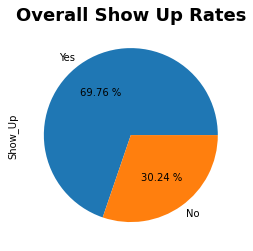

In [13]:
df.Show_Up.value_counts(normalize="index").plot.pie(autopct='%.2f %%')
plt.title('Overall Show Up Rates', fontdict={'fontweight':'bold', 'fontsize': 18})
#plt.savefig('Overall Show Up rates.png', dpi=300)
plt.show()

#### Percentage of Show Up across Year

In [14]:
pd.crosstab(df.A_year,df.Show_Up)

Show_Up,No,Yes
A_year,,
2014,46261,107518
2015,44350,101522


Text(0, 0.5, 'Percentage of Show-Up')

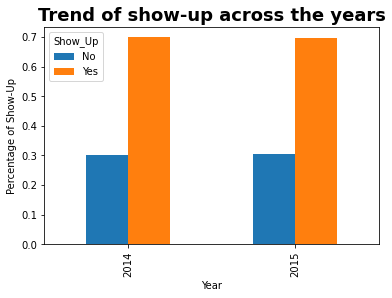

In [15]:
pd.crosstab(df.A_year,df.Show_Up,normalize="index").plot.bar()
plt.title('Trend of show-up across the years', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.xlabel('Year')
plt.ylabel('Percentage of Show-Up')
#plt.savefig('Show-up trend across the years.png', dpi=300)

### Q3: What kind of people or age-group are likely to no-show? Or it's random?

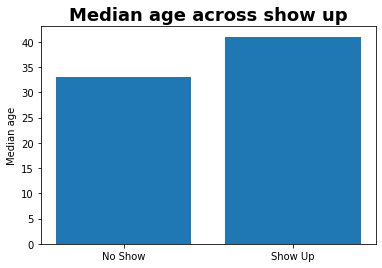

In [16]:
median_age_noshow = df[df['Show_Up']=="No"]['Age'].median()
median_age_show = df[df['Show_Up']=="Yes"]['Age'].median()
age_show = [median_age_noshow,median_age_show]
x_names = ['No Show','Show Up']
plt.bar(x_names,age_show)
plt.title('Median age across show up', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.ylabel('Median age')
#plt.savefig('Median age across show up.png', dpi=300)
plt.show()

#### Method 1: Split according to 20 per bin

In [17]:
#Create Age Group Column

conditions = [df['Age'] < 20, df['Age'] < 40, df['Age'] < 60, df['Age'] < 80, df['Age'] < 100, df['Age'] < 120]
choices = ['0-20', '20-39', '40-59', '60-79', '80-99', '100-119']


df['AgeGroup'] = np.select(conditions, choices, default=np.nan)
df

,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,Sms_Reminder,Waiting_Time,Show_Up,R_Dates,A_Dates,R_month_year,A_month_year,A_year,R_hour,AgeGroup
0,19,M,Wednesday,0,0,0,0,0,0,0,0,-29,Yes,2014-12-16 14:46:25+00:00,2015-01-14 00:00:00+00:00,2014-12-16,2015-01-14,2015,14,0-20
1,24,F,Wednesday,0,0,0,0,0,0,0,0,-1,Yes,2015-08-18 07:01:26+00:00,2015-08-19 00:00:00+00:00,2015-08-18,2015-08-19,2015,7,20-39
2,4,F,Tuesday,0,0,0,0,0,0,0,0,-1,Yes,2014-02-17 12:53:46+00:00,2014-02-18 00:00:00+00:00,2014-02-17,2014-02-18,2014,12,0-20
3,5,M,Thursday,0,0,0,0,0,0,0,1,-15,Yes,2014-07-23 17:02:11+00:00,2014-08-07 00:00:00+00:00,2014-07-23,2014-08-07,2014,17,0-20
4,38,M,Tuesday,0,0,0,0,0,0,0,1,-6,Yes,2015-10-21 15:20:09+00:00,2015-10-27 00:00:00+00:00,2015-10-21,2015-10-27,2015,15,20-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,41,M,Wednesday,0,0,1,0,0,0,0,1,-23,Yes,2014-03-24 09:28:22+00:00,2014-04-16 00:00:00+00:00,2014-03-24,2014-04-16,2014,9,40-59
299996,67,F,Tuesday,1,0,1,0,0,0,0,1,-4,Yes,2014-11-21 12:00:36+00:00,2014-11-25 00:00:00+00:00,2014-11-21,2014-11-25,2014,12,60-79
299997,48,F,Friday,0,0,0,0,0,1,0,0,-1,No,2014-07-24 15:46:38+00:00,2014-07-25 00:00:00+00:00,2014-07-24,2014-07-25,2014,15,40-59
299998,5,M,Thursday,0,0,0,0,0,0,0,0,-6,Yes,2015-05-15 09:58:50+00:00,2015-05-21 00:00:00+00:00,2015-05-15,2015-05-21,2015,9,0-20


In [18]:
pd.crosstab(df.AgeGroup,df.Show_Up, normalize='index').round(4)*100

Show_Up,No,Yes
AgeGroup,,
0-20,34.35,65.65
100-119,27.03,72.97
20-39,35.23,64.77
40-59,27.47,72.53
60-79,21.86,78.14
80-99,23.64,76.36


<font color="8DD7BF">Findings: Seems like all pretty equal percentage of no-shows.
However, possibly 0-20 and 20-39 seem to have the greatest disparity.
There also seems to be a pattern: Older Age groups have lower disparity.<font>

#### Method 2: Split according to age categories (youth, young adulthood, middle adulthood, older adulthood, and seniors)

In [19]:
# Bin age and change to ordered categorical variable
conditions = [df['Age'] < 15, df['Age'] < 25, df['Age'] < 45, df['Age'] < 65, df['Age'] < 120]
choices = ['0-14', '15-24', '25-44', '45-64', '<65']
df['AgeGroup'] = np.select(conditions, choices, default=np.nan)
cat_type = CategoricalDtype(categories=choices,ordered=True)
df_cat = df.astype(cat_type)
df['AgeGroup']= df_cat['AgeGroup']

Show_Up      No    Yes
AgeGroup              
0-14      33.09  66.91
15-24     38.13  61.87
25-44     33.63  66.37
45-64     25.62  74.38
<65       21.85  78.15


<Figure size 864x504 with 0 Axes>

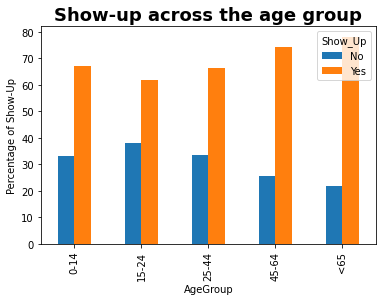

In [20]:
plt.figure(figsize=(12,7))
round(pd.crosstab(df.AgeGroup,df.Show_Up, normalize='index')*100,2).plot.bar()
print(round(pd.crosstab(df.AgeGroup,df.Show_Up, normalize='index')*100,2))
plt.title('Show-up across the age group', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.ylabel('Percentage of Show-Up')
plt.show()
#plt.savefig('Show-up across the age group.png', dpi=300)

### Q4: Does sending reminder help with no-show?

In [21]:
pd.crosstab(df.Sms_Reminder,df.Show_Up, normalize="index").round(4)*100


Show_Up,No,Yes
Sms_Reminder,,
0,30.26,69.74
1,30.21,69.79
2,33.54,66.46


<font color="8DD7BF">Findings: No reminders dont help with no-show since more reminders higher percentage of no-show. 1 and no reminders same percentage<font>

In [22]:
pd.crosstab(df.Waiting_Time,df.Show_Up, normalize="index").round(4)*100

Show_Up,No,Yes
Waiting_Time,,
-398,100.00,0.00
-350,0.00,100.00
-349,100.00,0.00
-343,0.00,100.00
-334,25.00,75.00
...,...,...
-5,26.28,73.72
-4,24.68,75.32
-3,26.04,73.96


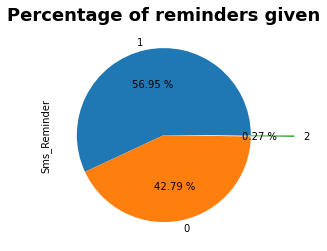

In [23]:
explode = (0,0,.5)
df.Sms_Reminder.value_counts().plot.pie(explode=explode,autopct='%.2f %%')
plt.title('Percentage of reminders given', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.show()
#plt.savefig('Percentage of reminders given.png', dpi=300)

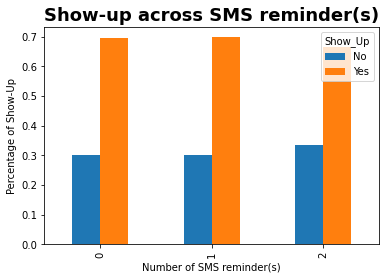

In [24]:
pd.crosstab(df.Sms_Reminder,df.Show_Up, normalize="index").plot.bar()
plt.title('Show-up across SMS reminder(s)', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.xlabel('Number of SMS reminder(s)')
plt.ylabel('Percentage of Show-Up')
plt.show()
#plt.savefig('Show-up across SMS reminder(s)', dpi=300)

### Waiting Time

In [25]:
df.groupby('Show_Up')['Waiting_Time'].mean()
#Not much difference but can say that longer waiting time tend to show up not as often.

Show_Up
No    -15.436272
Yes   -13.155066
Name: Waiting_Time, dtype: float64

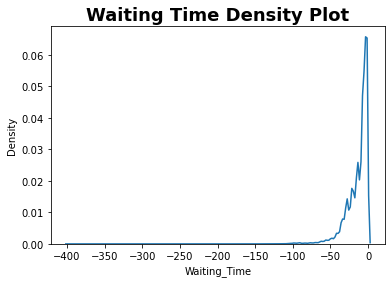

In [26]:
sns.kdeplot(df['Waiting_Time'])
plt.title('Waiting Time Density Plot', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.show()
#plt.savefig('Waiting Time Density Plot', dpi=300)

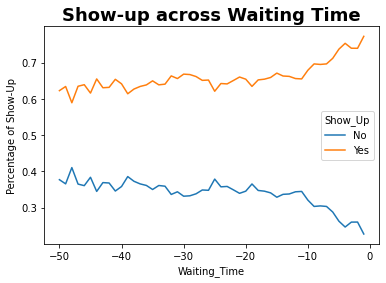

In [27]:
wt = pd.crosstab(df.Waiting_Time,df.Show_Up,normalize='index')
wt[-50:].plot()
plt.ylabel('Percentage of Show-Up')
plt.title('Show-up across Waiting Time', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.show()
#plt.savefig('Show-up across Waiting Time', dpi=300)

#### Day Of The Week

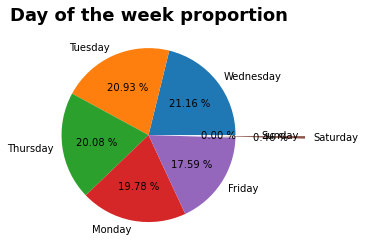

In [28]:
explode = (0,0,0,0,0,.8,.2)
df.Day.value_counts().plot.pie(explode = explode,autopct='%.2f %%')
plt.title('Day of the week proportion', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.ylabel('')
plt.show()
#plt.savefig('Day chart', dpi=300)

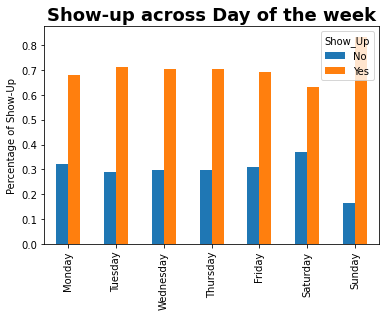

In [29]:
pd.crosstab(df.Day,df.Show_Up,normalize='index').plot.bar()
plt.ylabel('Percentage of Show-Up')
plt.xlabel('')
plt.title('Show-up across Day of the week', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.show()
#plt.savefig('Show-up across Day', dpi=300)

#### Appointment Time

In [30]:
pd.crosstab(df.R_hour,df.Show_Up,normalize='index')

Show_Up,No,Yes
R_hour,,
5,1.000000,0.000000
6,0.236482,0.763518
7,0.246185,0.753815
8,0.297929,0.702071
9,0.311217,0.688783
10,0.316251,0.683749
11,0.314685,0.685315
12,0.304707,0.695293
13,0.319859,0.680141


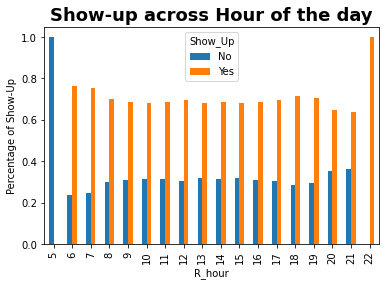

In [31]:
pd.crosstab(df.R_hour,df.Show_Up,normalize='index').plot.bar()
plt.ylabel('Percentage of Show-Up')
plt.title('Show-up across Hour of the day', fontdict={'fontweight':'bold', 'fontsize': 18})
#plt.savefig('Show-up across Hour of the day', dpi=300)
plt.show()

### Categorical Variables
#### Comparing Show Up vs No Show
##### Shortcut to see all graphs at one glance

In [32]:
cat = ['Gender','Day','Diabetes','Drinks','HyperTension','Handicap','Smoker','Scholarship','Tuberculosis','Sms_Reminder','AgeGroup']

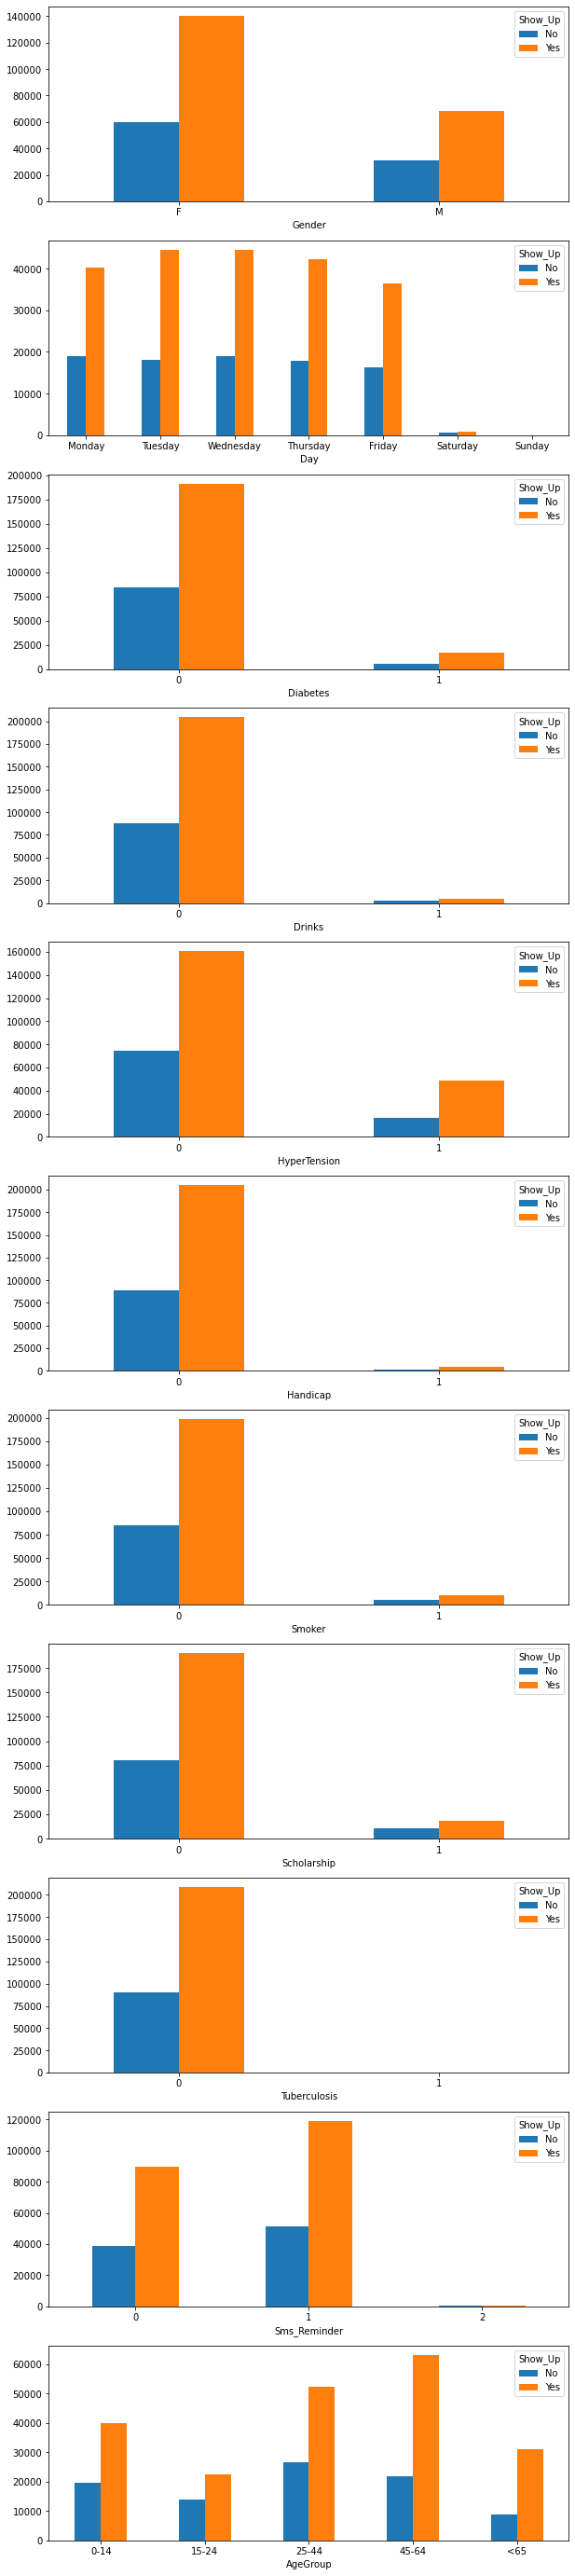

In [33]:
fig, ax = plt.subplots(len(cat), figsize =(10,50))

for i in range(len(ax)):
    df.groupby(['Show_Up',cat[i]]).Show_Up.agg("count").unstack(0).plot.bar(ax=ax[i],rot=0)

1. It seems that for Age Group 40-59 and 60-79 have a greater disparity between show up vs no show
2. Females also seem to have higher disparity between show and no show

#### Comparing No Shows Among the Variables

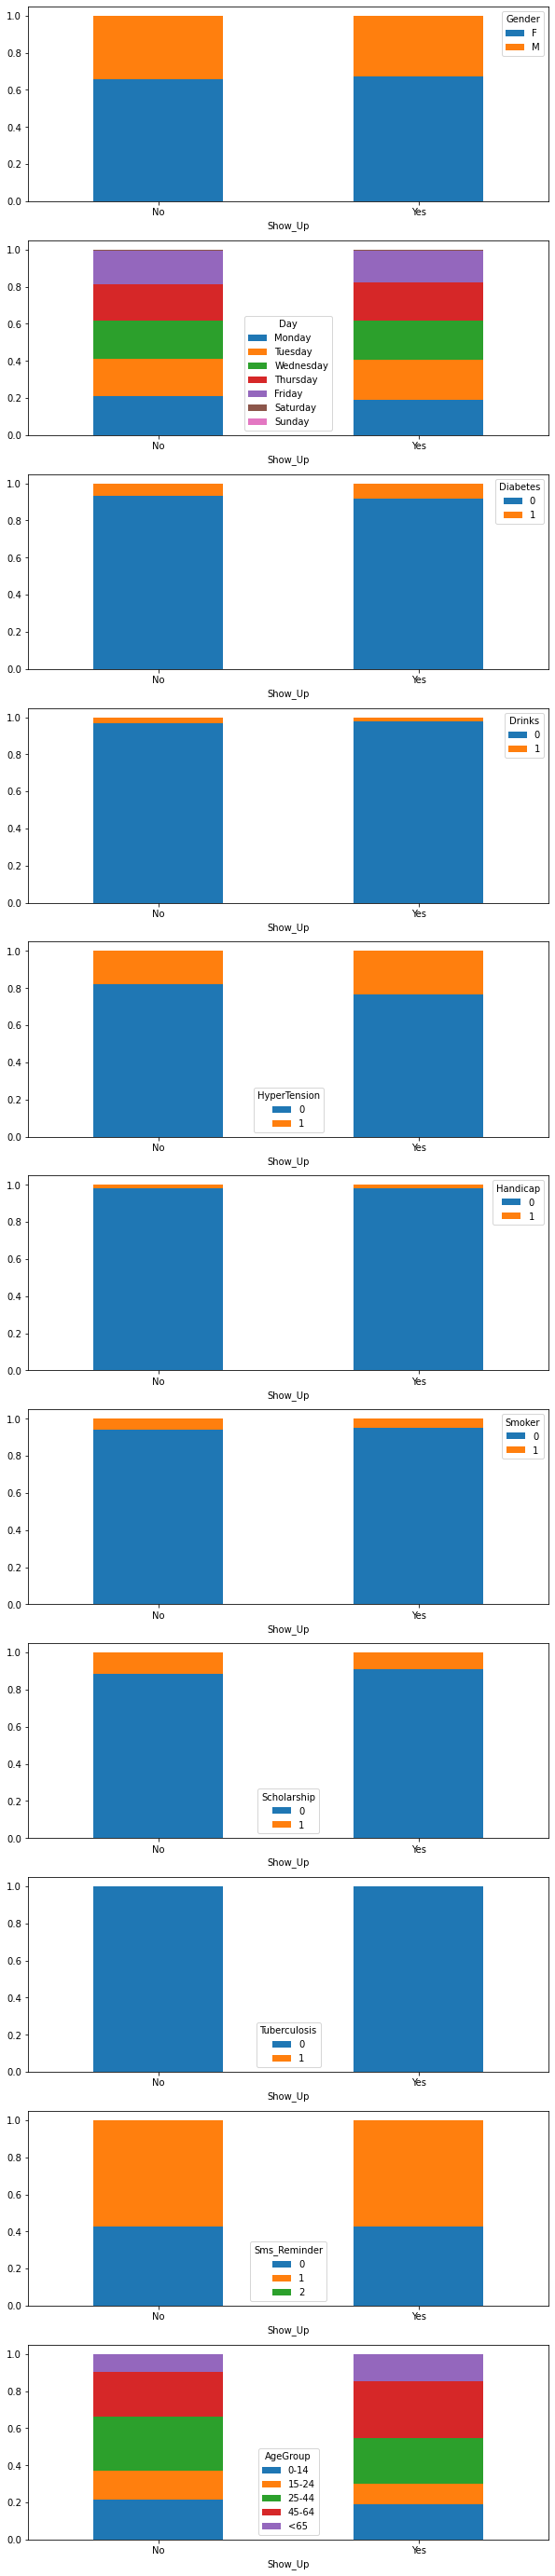

In [34]:
fig, ax = plt.subplots(len(cat), figsize =(10,50))

for i in range(len(ax)):
    pd.crosstab(df.Show_Up,df[cat[i]], normalize="index").plot.bar(ax=ax[i],rot=0, stacked=True)

#### Gender

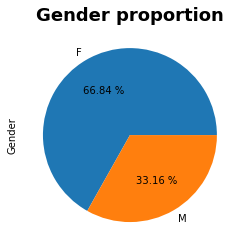

In [35]:
df.Gender.value_counts().plot.pie(autopct='%.2f %%')
plt.title('Gender proportion', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.show()
#plt.savefig('Gender pie chart', dpi=300)

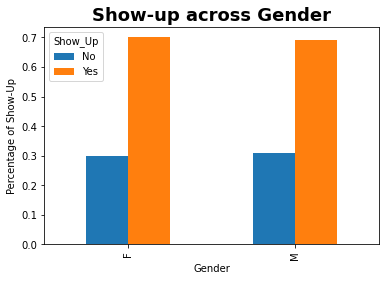

In [36]:
pd.crosstab(df.Gender,df.Show_Up, normalize="index").plot.bar()
plt.ylabel('Percentage of Show-Up')
plt.title('Show-up across Gender', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.show()
#plt.savefig('Show-up across Gender', dpi=300)

#### Diabetes

In [37]:
pd.crosstab(df.Diabetes,df.Show_Up,normalize='index')

Show_Up,No,Yes
Diabetes,,
0,0.306539,0.693461
1,0.253307,0.746693


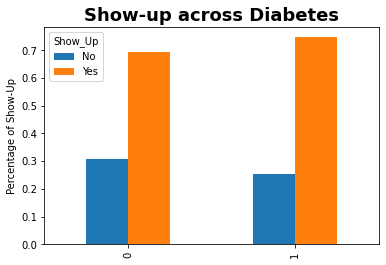

In [38]:
pd.crosstab(df.Diabetes,df.Show_Up,normalize='index').plot.bar()
plt.ylabel('Percentage of Show-Up')
plt.xlabel('')
plt.title('Show-up across Diabetes', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.show()
#plt.savefig('Show-up across Diabetes', dpi=300)

#### Drinks

In [39]:
pd.crosstab(df.Drinks,df.Show_Up,normalize='index')

Show_Up,No,Yes
Drinks,,
0,0.300523,0.699477
1,0.375184,0.624816


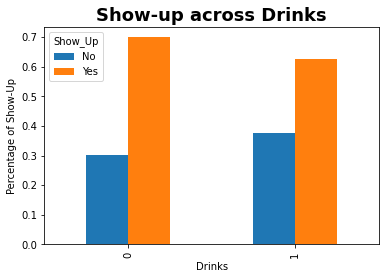

In [40]:
pd.crosstab(df.Drinks,df.Show_Up,normalize='index').plot.bar()
plt.ylabel('Percentage of Show-Up')
plt.title('Show-up across Drinks', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.show()
#plt.savefig('Show-up across Drinks', dpi=300)

#### Hypertension

In [41]:
pd.crosstab(df.HyperTension,df.Show_Up,normalize='index')

Show_Up,No,Yes
HyperTension,,
0,0.316631,0.683369
1,0.250684,0.749316


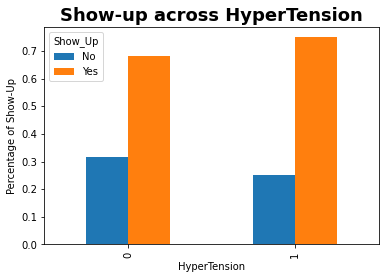

In [42]:
pd.crosstab(df.HyperTension,df.Show_Up,normalize='index').plot.bar()
plt.ylabel('Percentage of Show-Up')
plt.title('Show-up across HyperTension', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.show()
#plt.savefig('Show-up across HyperTension', dpi=300)

#### Handicap

In [43]:
pd.crosstab(df.Handicap,df.Show_Up,normalize='index')

Show_Up,No,Yes
Handicap,,
0,0.302812,0.697188
1,0.280115,0.719885


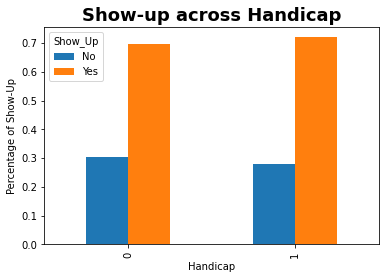

In [44]:
pd.crosstab(df.Handicap,df.Show_Up,normalize='index').plot.bar()
plt.ylabel('Percentage of Show-Up')
plt.title('Show-up across Handicap', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.show()
#plt.savefig('Show-up across Handicap', dpi=300)

#### Smoker

In [45]:
pd.crosstab(df.Smoker,df.Show_Up,normalize='index')

Show_Up,No,Yes
Smoker,,
0,0.299786,0.700214
1,0.349503,0.650497


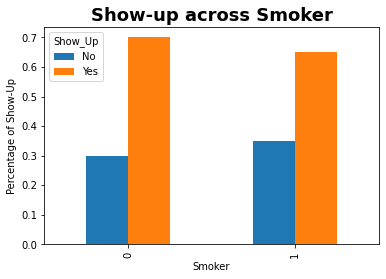

In [46]:
pd.crosstab(df.Smoker,df.Show_Up,normalize='index').plot.bar()
plt.ylabel('Percentage of Show-Up')
plt.title('Show-up across Smoker', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.show()
#plt.savefig('Show-up across Smoker', dpi=300)

#### Scholarship

In [47]:
pd.crosstab(df.Scholarship,df.Show_Up,normalize='index')

Show_Up,No,Yes
Scholarship,,
0,0.296209,0.703791
1,0.359974,0.640026


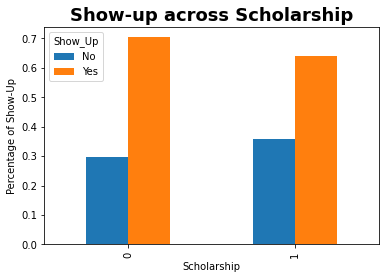

In [48]:
pd.crosstab(df.Scholarship,df.Show_Up,normalize='index').plot.bar()
plt.ylabel('Percentage of Show-Up')
plt.title('Show-up across Scholarship', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.show()
#plt.savefig('Show-up across Scholarship', dpi=300)

#### Tuberculosis

In [49]:
pd.crosstab(df.Tuberculosis,df.Show_Up,normalize='index')

Show_Up,No,Yes
Tuberculosis,,
0,0.302351,0.697649
1,0.385185,0.614815


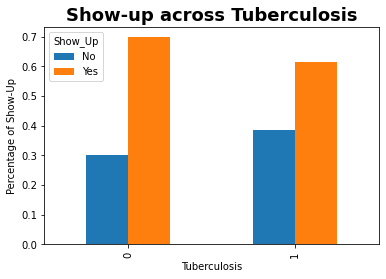

In [50]:
pd.crosstab(df.Tuberculosis,df.Show_Up,normalize='index').plot.bar()
plt.ylabel('Percentage of Show-Up')
plt.title('Show-up across Tuberculosis', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.show()
#plt.savefig('Show-up across Tuberculosis', dpi=300)

### No-Show Time Series Analysis
#### Comparing Register Dates
##### Creating No Show Only Dataframe

In [51]:
noshow = df[df.Show_Up=="No"]
noshow

,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,Sms_Reminder,Waiting_Time,Show_Up,R_Dates,A_Dates,R_month_year,A_month_year,A_year,R_hour,AgeGroup
5,5,F,Tuesday,0,0,0,0,0,0,0,1,-35,No,2014-06-17 06:47:27+00:00,2014-07-22 00:00:00+00:00,2014-06-17,2014-07-22,2014,6,0-14
12,62,F,Monday,1,0,1,0,0,0,0,0,-17,No,2014-07-25 15:02:33+00:00,2014-08-11 00:00:00+00:00,2014-07-25,2014-08-11,2014,15,45-64
14,38,M,Thursday,0,0,0,0,0,0,0,1,-6,No,2014-03-21 08:23:16+00:00,2014-03-27 00:00:00+00:00,2014-03-21,2014-03-27,2014,8,25-44
17,52,M,Thursday,0,0,0,0,0,0,0,0,-2,No,2014-06-03 10:20:37+00:00,2014-06-05 00:00:00+00:00,2014-06-03,2014-06-05,2014,10,45-64
24,16,F,Tuesday,0,0,0,1,0,0,0,0,-5,No,2014-10-23 16:49:42+00:00,2014-10-28 00:00:00+00:00,2014-10-23,2014-10-28,2014,16,15-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299982,84,F,Friday,0,0,1,0,0,0,0,0,-3,No,2014-11-04 13:54:47+00:00,2014-11-07 00:00:00+00:00,2014-11-04,2014-11-07,2014,13,<65
299985,0,F,Tuesday,0,0,0,0,0,0,0,0,-28,No,2015-06-16 16:01:27+00:00,2015-07-14 00:00:00+00:00,2015-06-16,2015-07-14,2015,16,0-14
299990,55,M,Friday,1,1,1,0,1,0,0,1,-7,No,2015-06-12 07:22:07+00:00,2015-06-19 00:00:00+00:00,2015-06-12,2015-06-19,2015,7,45-64
299993,49,F,Tuesday,0,0,0,0,1,0,0,1,-26,No,2015-01-15 08:44:24+00:00,2015-02-10 00:00:00+00:00,2015-01-15,2015-02-10,2015,8,45-64


##### Time-Series No-Show Chart

<AxesSubplot:xlabel='R_month_year'>

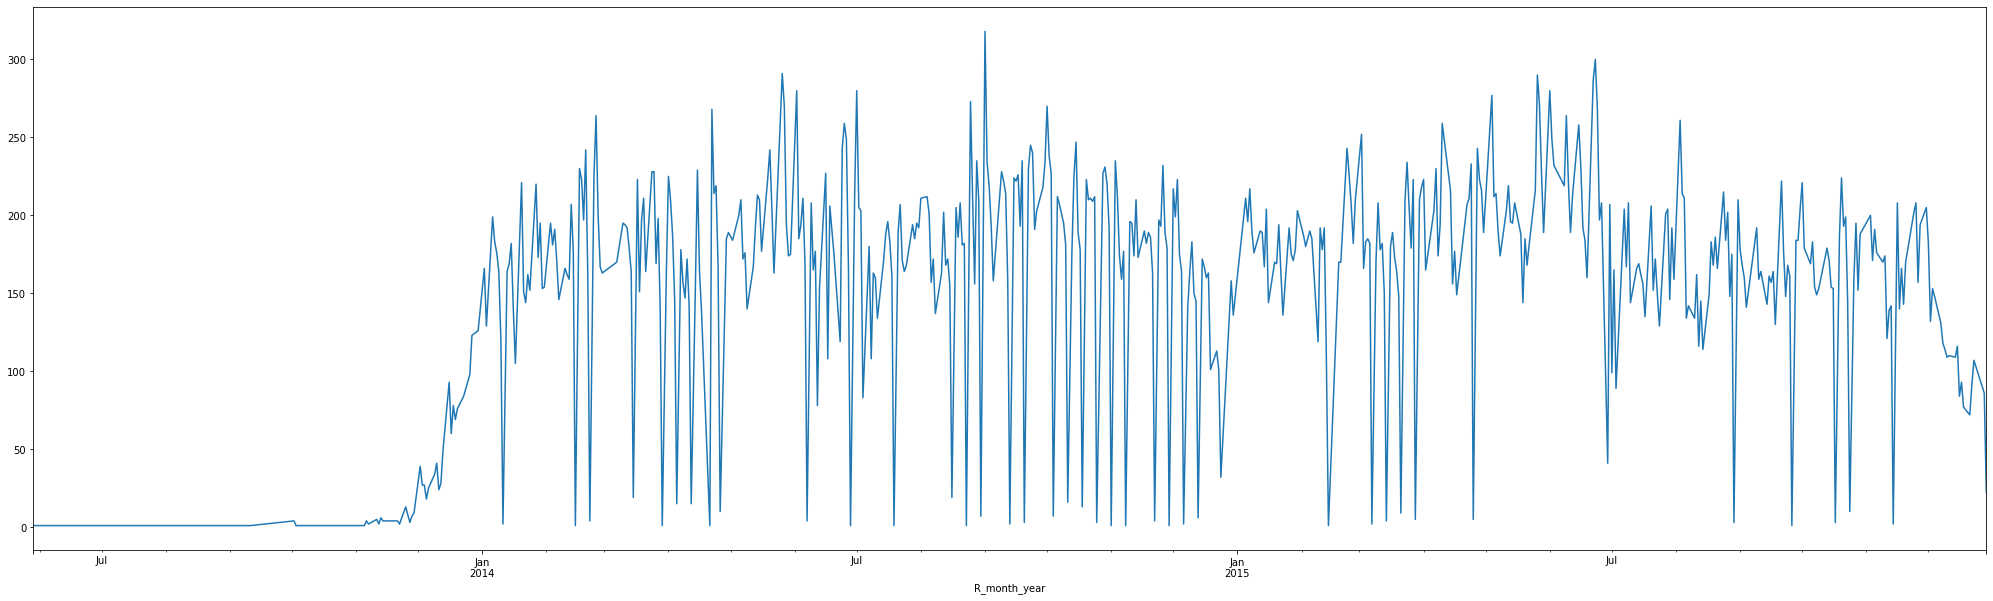

In [52]:
noshow.groupby('R_month_year').size().plot(figsize = (35,10))

##### Time-Series No-Show vs Show

<AxesSubplot:xlabel='R_month_year'>

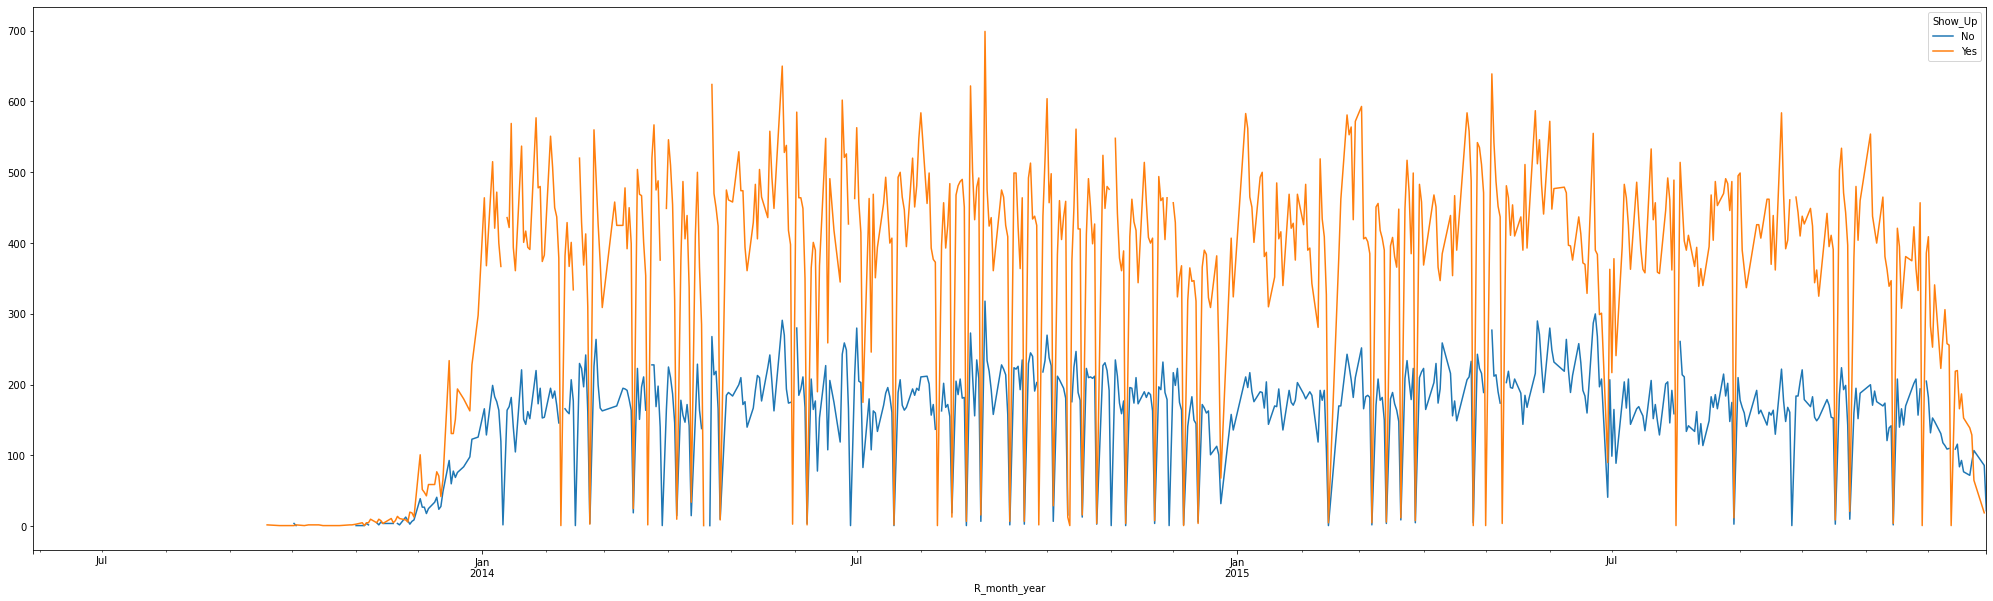

In [53]:
df.groupby(['R_month_year','Show_Up']).size().unstack().plot(figsize = (35,10))

##### Time-Series No-Show vs Show Normalised

<AxesSubplot:xlabel='R_month_year'>

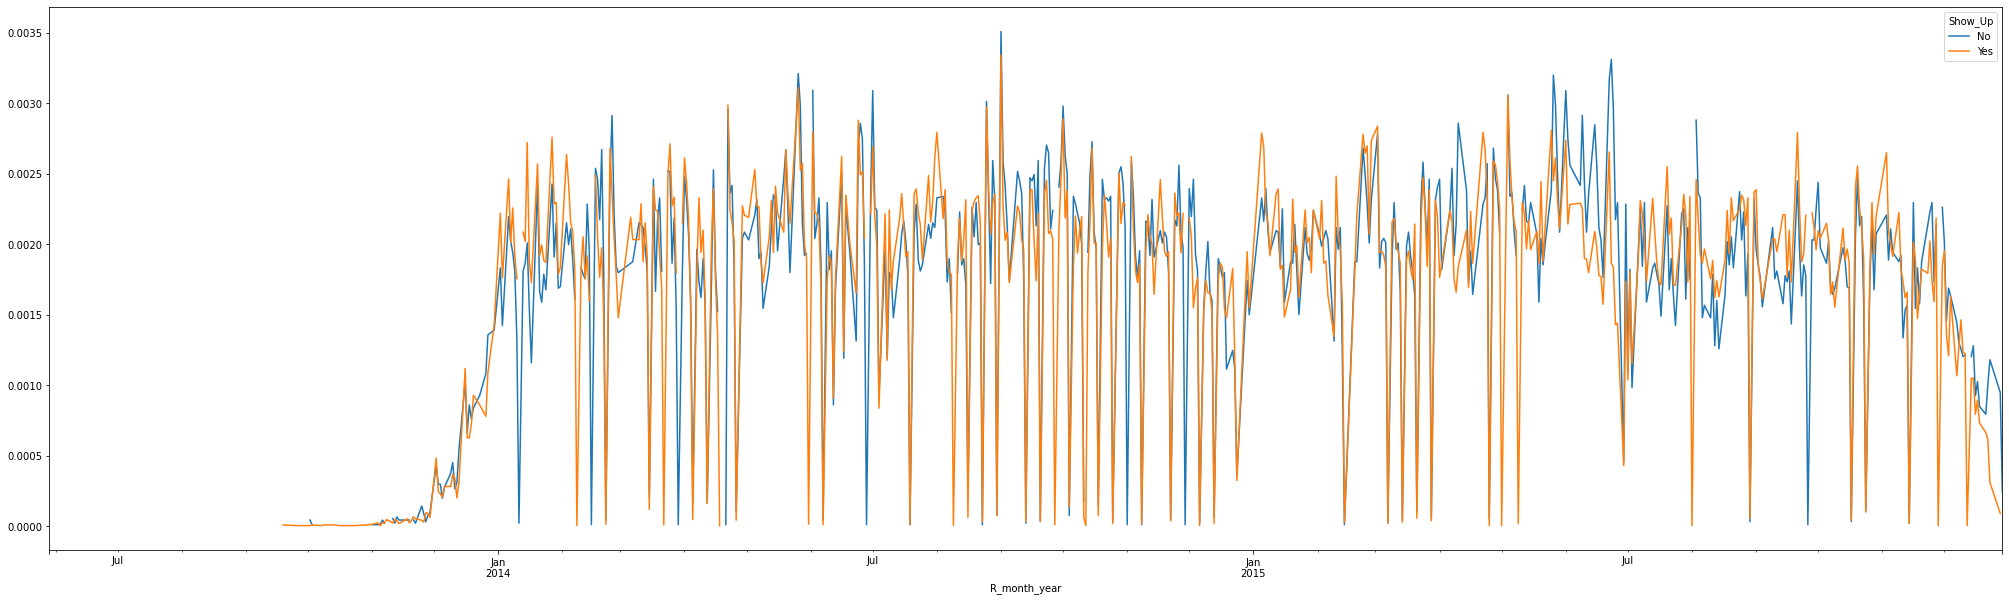

In [54]:
df.groupby('Show_Up')['R_month_year'].value_counts(normalize=True).unstack(level=0).plot(figsize=(35,10))

#### Comparing Appointment Dates
##### Time-Series No-Show Appointment Dates

<AxesSubplot:xlabel='A_month_year'>

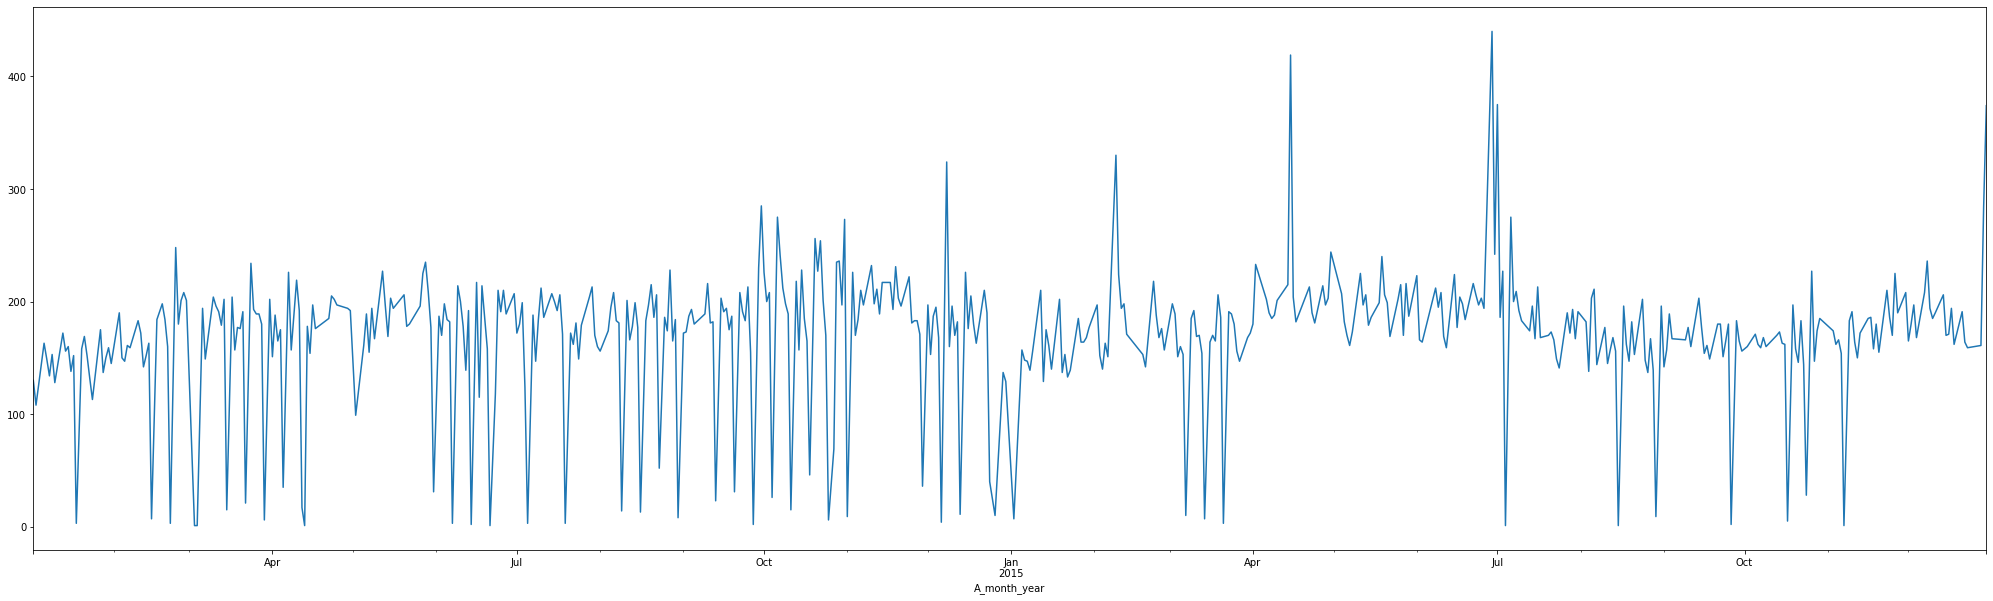

In [55]:
noshow.groupby('A_month_year').size().plot(figsize = (35,10))

##### Time Series No-Show vs Show

<AxesSubplot:xlabel='A_month_year'>

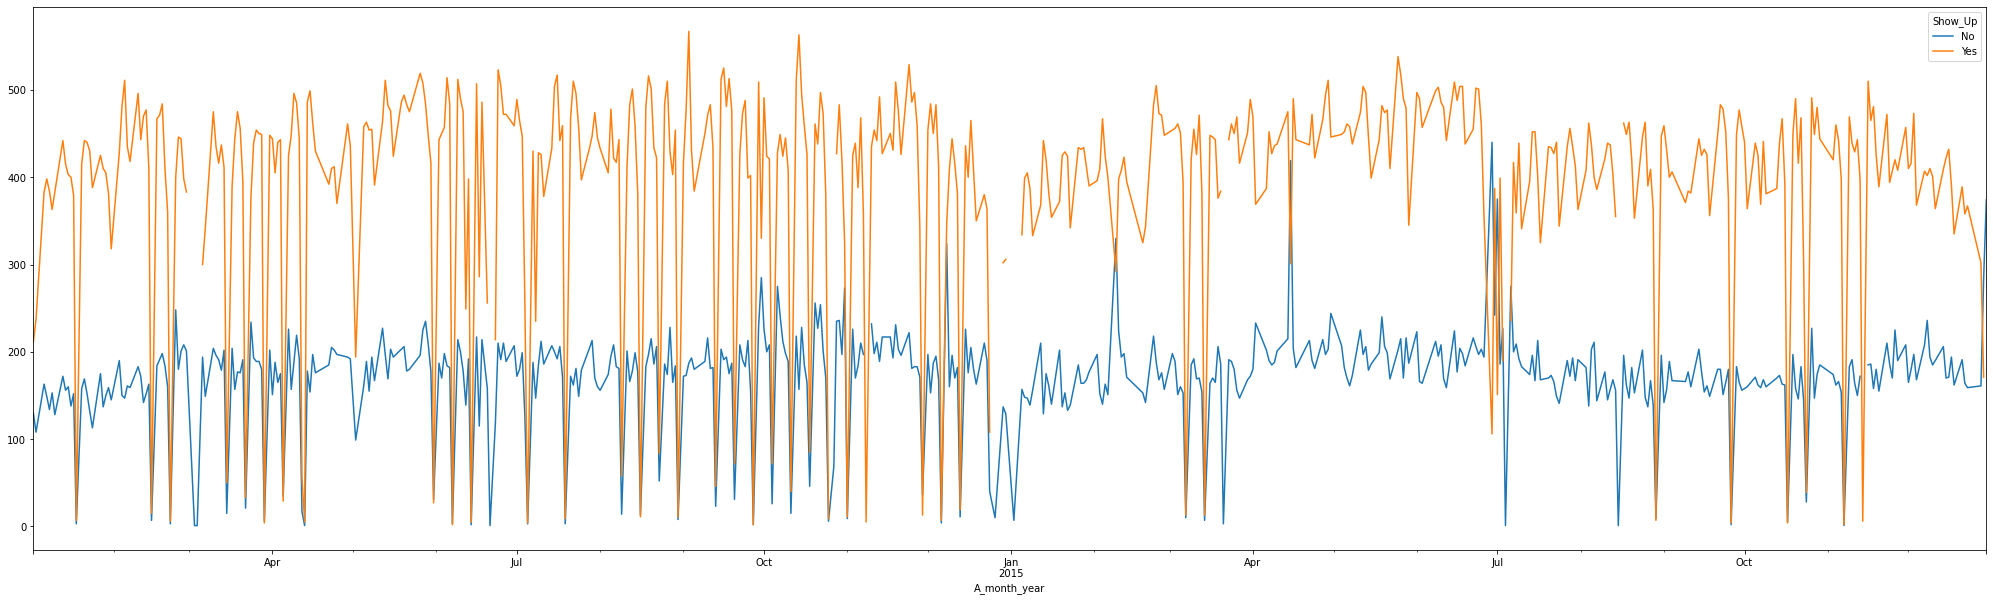

In [56]:
df.groupby(['A_month_year','Show_Up']).size().unstack().plot(figsize = (35,10))

##### Time Series No-Show vs Show Normalised

<AxesSubplot:xlabel='A_month_year'>

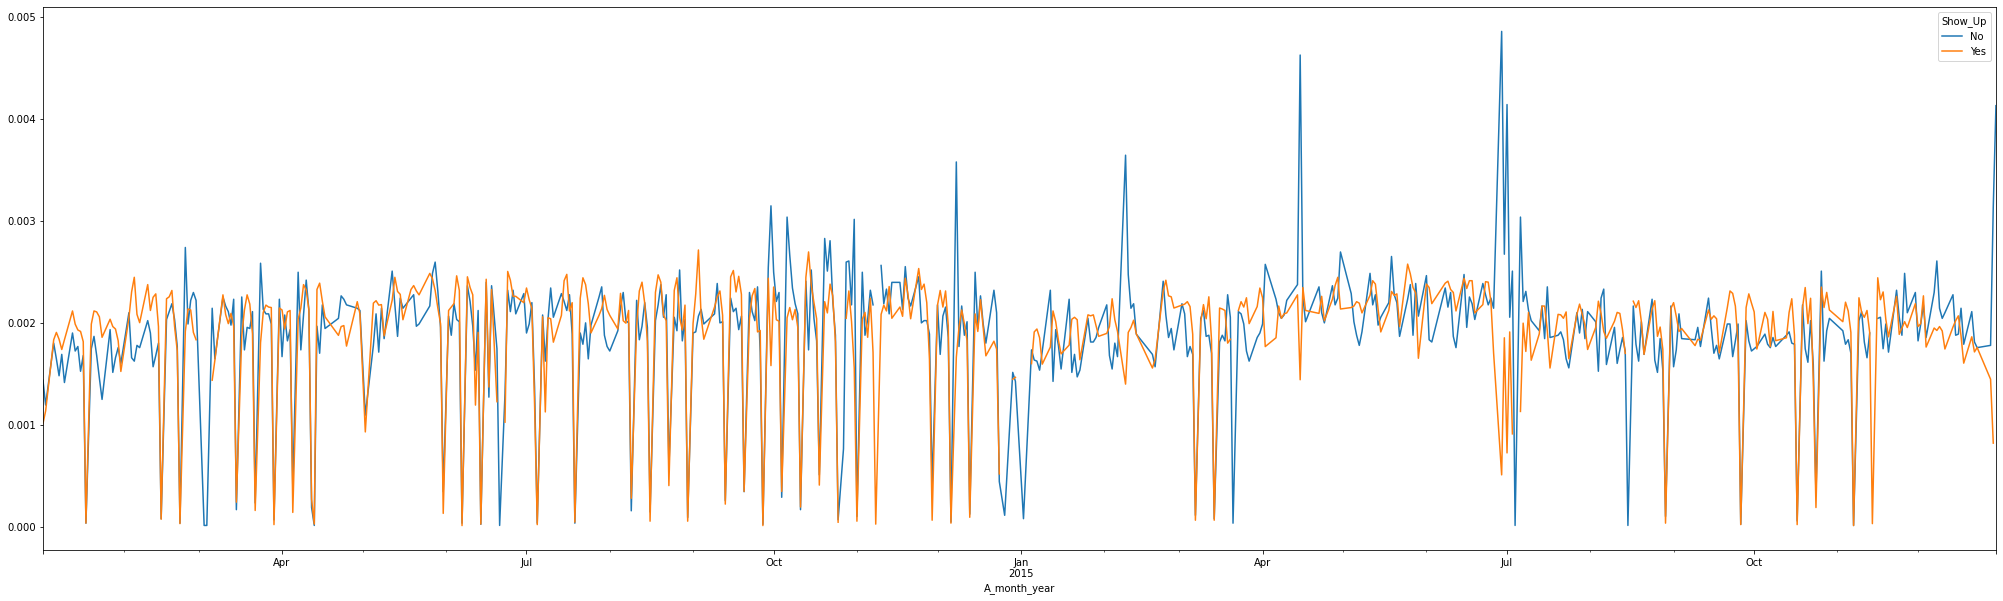

In [57]:
df.groupby('Show_Up')['A_month_year'].value_counts(normalize=True).unstack(level=0).plot(figsize=(35,10))

<AxesSubplot:xlabel='Waiting_Time'>

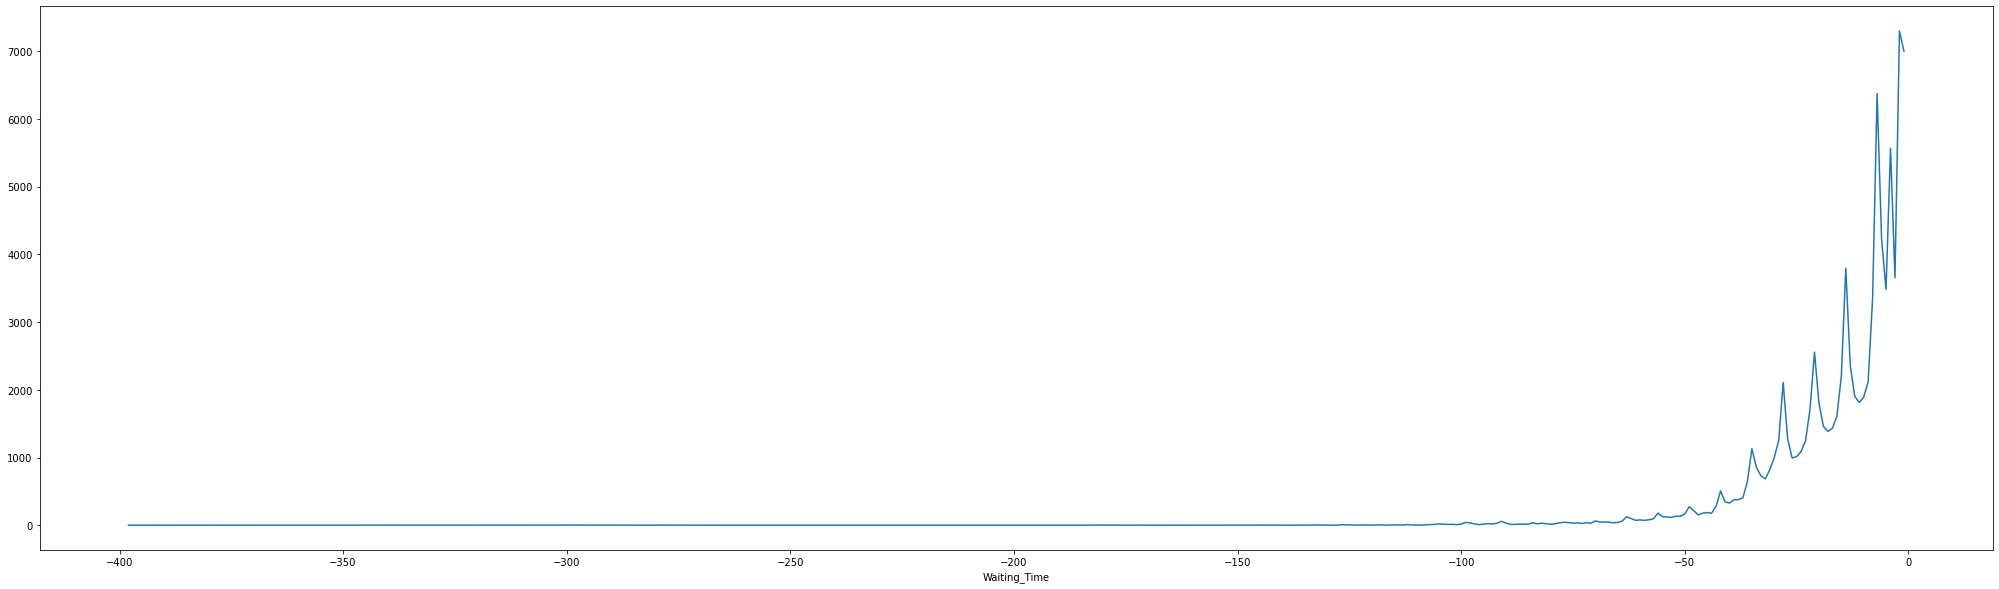

In [58]:
noshow.groupby('Waiting_Time').size().plot(figsize = (35,10))

<AxesSubplot:xlabel='Waiting_Time'>

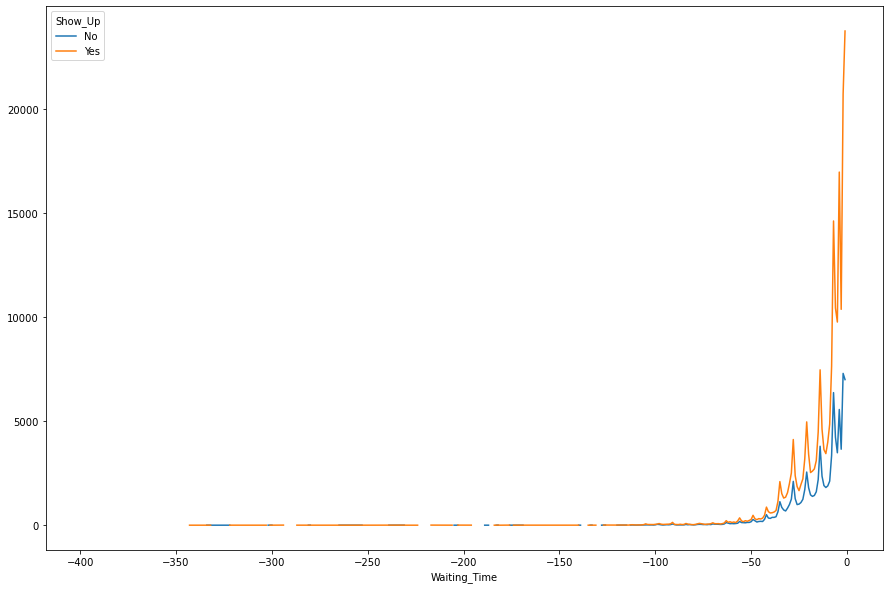

In [59]:
df.groupby(['Waiting_Time','Show_Up']).size().unstack().plot(figsize = (15,10))

(-100.0, 0.0)

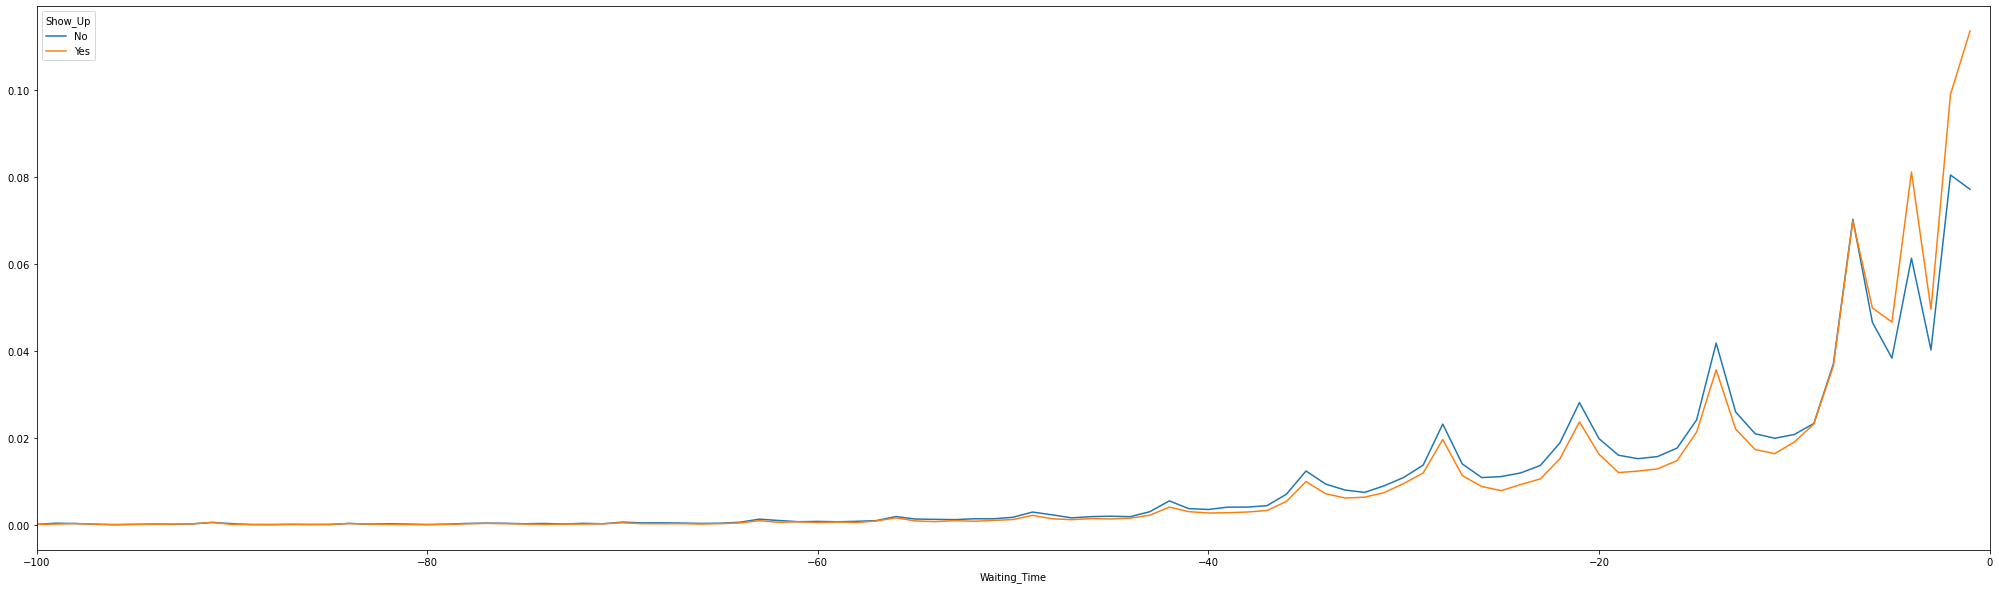

In [60]:
df.groupby('Show_Up')['Waiting_Time'].value_counts(normalize=True).unstack(level=0).plot(figsize=(35,10))
plt.xlim(-100,0)

(-20.0, 0.0)

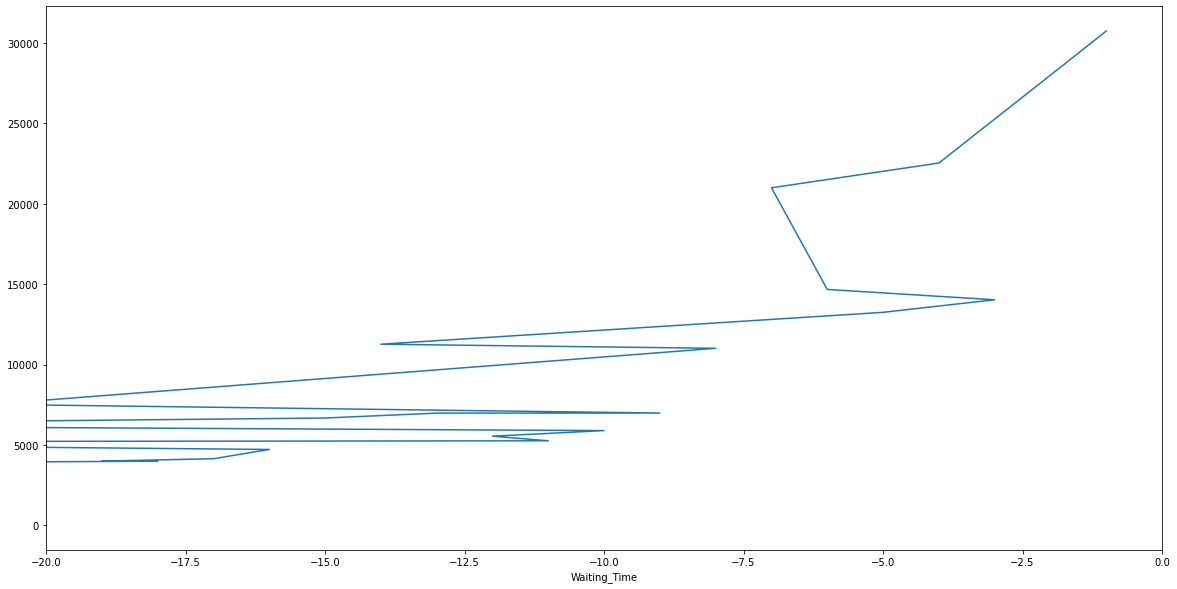

In [61]:
df.groupby('Waiting_Time').size().sort_values(ascending=False).plot(figsize=(20,10))
plt.xlim(-20,0)

## <font color="FF828B">3. Data Manipulation For Web Application Prototype<font>

#### 3.1 Drop Columns Added for Data Exploration and Visualisation

In [62]:
df = df.drop(["R_month_year","A_month_year","A_year","R_hour", "AgeGroup"],axis =1)
df

,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,Sms_Reminder,Waiting_Time,Show_Up,R_Dates,A_Dates
0,19,M,Wednesday,0,0,0,0,0,0,0,0,-29,Yes,2014-12-16 14:46:25+00:00,2015-01-14 00:00:00+00:00
1,24,F,Wednesday,0,0,0,0,0,0,0,0,-1,Yes,2015-08-18 07:01:26+00:00,2015-08-19 00:00:00+00:00
2,4,F,Tuesday,0,0,0,0,0,0,0,0,-1,Yes,2014-02-17 12:53:46+00:00,2014-02-18 00:00:00+00:00
3,5,M,Thursday,0,0,0,0,0,0,0,1,-15,Yes,2014-07-23 17:02:11+00:00,2014-08-07 00:00:00+00:00
4,38,M,Tuesday,0,0,0,0,0,0,0,1,-6,Yes,2015-10-21 15:20:09+00:00,2015-10-27 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,41,M,Wednesday,0,0,1,0,0,0,0,1,-23,Yes,2014-03-24 09:28:22+00:00,2014-04-16 00:00:00+00:00
299996,67,F,Tuesday,1,0,1,0,0,0,0,1,-4,Yes,2014-11-21 12:00:36+00:00,2014-11-25 00:00:00+00:00
299997,48,F,Friday,0,0,0,0,0,1,0,0,-1,No,2014-07-24 15:46:38+00:00,2014-07-25 00:00:00+00:00
299998,5,M,Thursday,0,0,0,0,0,0,0,0,-6,Yes,2015-05-15 09:58:50+00:00,2015-05-21 00:00:00+00:00


#### 3.2 Create Patient IDs & Password

In [63]:
df['patient_id'] = df.groupby(['Age','Gender','Day','Diabetes','HyperTension','Handicap','Smoker','Scholarship','Tuberculosis','Waiting_Time']).ngroup().add(1)
df

,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,Sms_Reminder,Waiting_Time,Show_Up,R_Dates,A_Dates,patient_id
0,19,M,Wednesday,0,0,0,0,0,0,0,0,-29,Yes,2014-12-16 14:46:25+00:00,2015-01-14 00:00:00+00:00,12049
1,24,F,Wednesday,0,0,0,0,0,0,0,0,-1,Yes,2015-08-18 07:01:26+00:00,2015-08-19 00:00:00+00:00,15178
2,4,F,Tuesday,0,0,0,0,0,0,0,0,-1,Yes,2014-02-17 12:53:46+00:00,2014-02-18 00:00:00+00:00,2435
3,5,M,Thursday,0,0,0,0,0,0,0,1,-15,Yes,2014-07-23 17:02:11+00:00,2014-08-07 00:00:00+00:00,3435
4,38,M,Tuesday,0,0,0,0,0,0,0,1,-6,Yes,2015-10-21 15:20:09+00:00,2015-10-27 00:00:00+00:00,28840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,41,M,Wednesday,0,0,1,0,0,0,0,1,-23,Yes,2014-03-24 09:28:22+00:00,2014-04-16 00:00:00+00:00,32225
299996,67,F,Tuesday,1,0,1,0,0,0,0,1,-4,Yes,2014-11-21 12:00:36+00:00,2014-11-25 00:00:00+00:00,64695
299997,48,F,Friday,0,0,0,0,0,1,0,0,-1,No,2014-07-24 15:46:38+00:00,2014-07-25 00:00:00+00:00,40427
299998,5,M,Thursday,0,0,0,0,0,0,0,0,-6,Yes,2015-05-15 09:58:50+00:00,2015-05-21 00:00:00+00:00,3442


In [64]:
df1 = df.groupby('patient_id').size().sort_values(ascending=False)
df1

patient_id
442      123
592      119
181      112
522      112
43       106
        ... 
38077      1
38078      1
38079      1
38080      1
80304      1
Length: 80304, dtype: int64

In [65]:
df['patient_password'] = df['patient_id']
df1 = df.groupby('patient_password').size().sort_values(ascending=False)
df1

patient_password
442      123
592      119
181      112
522      112
43       106
        ... 
38077      1
38078      1
38079      1
38080      1
80304      1
Length: 80304, dtype: int64

In [66]:
df2 = df.sort_values('A_Dates').groupby('A_Dates').head(90)
df2

,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,Sms_Reminder,Waiting_Time,Show_Up,R_Dates,A_Dates,patient_id,patient_password
98613,53,M,Thursday,0,0,0,0,0,0,0,0,-3,Yes,2013-12-30 15:08:32+00:00,2014-01-02 00:00:00+00:00,47763,47763
172482,57,F,Thursday,0,0,1,0,0,0,0,1,-14,Yes,2013-12-19 09:27:54+00:00,2014-01-02 00:00:00+00:00,52740,52740
106285,36,M,Thursday,0,0,0,0,1,0,0,1,-6,Yes,2013-12-27 16:55:40+00:00,2014-01-02 00:00:00+00:00,26723,26723
79155,56,F,Thursday,0,0,0,0,0,0,0,1,-14,No,2013-12-19 09:49:56+00:00,2014-01-02 00:00:00+00:00,51268,51268
246545,28,M,Thursday,0,1,0,0,1,0,0,1,-17,No,2013-12-16 08:49:19+00:00,2014-01-02 00:00:00+00:00,18878,18878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91612,34,F,Wednesday,0,0,0,0,0,0,0,0,-2,No,2015-12-28 08:57:46+00:00,2015-12-30 00:00:00+00:00,23987,23987
183955,24,F,Wednesday,0,0,0,0,0,0,0,0,-2,No,2015-12-28 13:31:52+00:00,2015-12-30 00:00:00+00:00,15177,15177
117138,29,F,Wednesday,0,0,0,0,0,0,0,1,-34,No,2015-11-26 10:25:09+00:00,2015-12-30 00:00:00+00:00,19220,19220
86245,34,F,Wednesday,0,0,0,0,0,0,0,1,-44,No,2015-11-16 13:41:23+00:00,2015-12-30 00:00:00+00:00,23958,23958


#### 3.2 Appointment Number Creation

In [67]:
df2['ApptNo'] = df2.index +1
df2

,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,Sms_Reminder,Waiting_Time,Show_Up,R_Dates,A_Dates,patient_id,patient_password,ApptNo
98613,53,M,Thursday,0,0,0,0,0,0,0,0,-3,Yes,2013-12-30 15:08:32+00:00,2014-01-02 00:00:00+00:00,47763,47763,98614
172482,57,F,Thursday,0,0,1,0,0,0,0,1,-14,Yes,2013-12-19 09:27:54+00:00,2014-01-02 00:00:00+00:00,52740,52740,172483
106285,36,M,Thursday,0,0,0,0,1,0,0,1,-6,Yes,2013-12-27 16:55:40+00:00,2014-01-02 00:00:00+00:00,26723,26723,106286
79155,56,F,Thursday,0,0,0,0,0,0,0,1,-14,No,2013-12-19 09:49:56+00:00,2014-01-02 00:00:00+00:00,51268,51268,79156
246545,28,M,Thursday,0,1,0,0,1,0,0,1,-17,No,2013-12-16 08:49:19+00:00,2014-01-02 00:00:00+00:00,18878,18878,246546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91612,34,F,Wednesday,0,0,0,0,0,0,0,0,-2,No,2015-12-28 08:57:46+00:00,2015-12-30 00:00:00+00:00,23987,23987,91613
183955,24,F,Wednesday,0,0,0,0,0,0,0,0,-2,No,2015-12-28 13:31:52+00:00,2015-12-30 00:00:00+00:00,15177,15177,183956
117138,29,F,Wednesday,0,0,0,0,0,0,0,1,-34,No,2015-11-26 10:25:09+00:00,2015-12-30 00:00:00+00:00,19220,19220,117139
86245,34,F,Wednesday,0,0,0,0,0,0,0,1,-44,No,2015-11-16 13:41:23+00:00,2015-12-30 00:00:00+00:00,23958,23958,86246


#### 3.3 Assign Doctor and Nurse ID & Password

In [68]:
df2['doctor_id'] = df2.groupby('A_Dates').cumcount()+1
df2['doctor_id'] = list(map(lambda x: x if x<=3 else ((x%3)+1),df2.doctor_id))
df2

,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,Sms_Reminder,Waiting_Time,Show_Up,R_Dates,A_Dates,patient_id,patient_password,ApptNo,doctor_id
98613,53,M,Thursday,0,0,0,0,0,0,0,0,-3,Yes,2013-12-30 15:08:32+00:00,2014-01-02 00:00:00+00:00,47763,47763,98614,1
172482,57,F,Thursday,0,0,1,0,0,0,0,1,-14,Yes,2013-12-19 09:27:54+00:00,2014-01-02 00:00:00+00:00,52740,52740,172483,2
106285,36,M,Thursday,0,0,0,0,1,0,0,1,-6,Yes,2013-12-27 16:55:40+00:00,2014-01-02 00:00:00+00:00,26723,26723,106286,3
79155,56,F,Thursday,0,0,0,0,0,0,0,1,-14,No,2013-12-19 09:49:56+00:00,2014-01-02 00:00:00+00:00,51268,51268,79156,2
246545,28,M,Thursday,0,1,0,0,1,0,0,1,-17,No,2013-12-16 08:49:19+00:00,2014-01-02 00:00:00+00:00,18878,18878,246546,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91612,34,F,Wednesday,0,0,0,0,0,0,0,0,-2,No,2015-12-28 08:57:46+00:00,2015-12-30 00:00:00+00:00,23987,23987,91613,3
183955,24,F,Wednesday,0,0,0,0,0,0,0,0,-2,No,2015-12-28 13:31:52+00:00,2015-12-30 00:00:00+00:00,15177,15177,183956,1
117138,29,F,Wednesday,0,0,0,0,0,0,0,1,-34,No,2015-11-26 10:25:09+00:00,2015-12-30 00:00:00+00:00,19220,19220,117139,2
86245,34,F,Wednesday,0,0,0,0,0,0,0,1,-44,No,2015-11-16 13:41:23+00:00,2015-12-30 00:00:00+00:00,23958,23958,86246,3


In [69]:
#To Ensure that Doctors,Nurses and Patients have different credentials for log in, the user ID range should be different

#Find out the max patient id then multiply by 2 to make the range and digit different.
doubmaxpat = df2.patient_id.max()*2

df2['doctor_id']=list(map(lambda x: doubmaxpat+(x-1),df2.doctor_id))
df2

,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,Sms_Reminder,Waiting_Time,Show_Up,R_Dates,A_Dates,patient_id,patient_password,ApptNo,doctor_id
98613,53,M,Thursday,0,0,0,0,0,0,0,0,-3,Yes,2013-12-30 15:08:32+00:00,2014-01-02 00:00:00+00:00,47763,47763,98614,160590
172482,57,F,Thursday,0,0,1,0,0,0,0,1,-14,Yes,2013-12-19 09:27:54+00:00,2014-01-02 00:00:00+00:00,52740,52740,172483,160591
106285,36,M,Thursday,0,0,0,0,1,0,0,1,-6,Yes,2013-12-27 16:55:40+00:00,2014-01-02 00:00:00+00:00,26723,26723,106286,160592
79155,56,F,Thursday,0,0,0,0,0,0,0,1,-14,No,2013-12-19 09:49:56+00:00,2014-01-02 00:00:00+00:00,51268,51268,79156,160591
246545,28,M,Thursday,0,1,0,0,1,0,0,1,-17,No,2013-12-16 08:49:19+00:00,2014-01-02 00:00:00+00:00,18878,18878,246546,160592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91612,34,F,Wednesday,0,0,0,0,0,0,0,0,-2,No,2015-12-28 08:57:46+00:00,2015-12-30 00:00:00+00:00,23987,23987,91613,160592
183955,24,F,Wednesday,0,0,0,0,0,0,0,0,-2,No,2015-12-28 13:31:52+00:00,2015-12-30 00:00:00+00:00,15177,15177,183956,160590
117138,29,F,Wednesday,0,0,0,0,0,0,0,1,-34,No,2015-11-26 10:25:09+00:00,2015-12-30 00:00:00+00:00,19220,19220,117139,160591
86245,34,F,Wednesday,0,0,0,0,0,0,0,1,-44,No,2015-11-16 13:41:23+00:00,2015-12-30 00:00:00+00:00,23958,23958,86246,160592


In [70]:
df2['doctor_password'] = df2['doctor_id']

#### 3.4 Assign Missing Appointment Times

In [71]:
df2 = df2.reset_index(drop=True)
timeobj = df2.A_Dates[0]
timetest = timeobj + pd.DateOffset(hours=7,minutes=40)
df2['A_Dates'] = df2.A_Dates.dt.date
df2['ApptTime'] = timetest.time()

for i in (df2.A_Dates.unique()):
    test = df2[df2.A_Dates == i]
    for j in range(160590,160594):
        test1 = test[test.doctor_id == j]
        timetest = timeobj + pd.DateOffset(hours=7,minutes=40)
        time1 = timetest
        for k in range(0,len(test1)):
            time1 = time1 + pd.DateOffset(minutes=20)
            time2 = time1.time()
            if time2 == dt.time(12,0):
                time1 = time1 + pd.DateOffset(minutes=60)
                time2 = time1.time()
                df2.loc[test1.index[k],'ApptTime'] = time2
            elif time2 == dt.time(18,0):
                time1 = time1 + pd.DateOffset(minutes=60)
                time2 = time1.time()
                df2.loc[test1.index[k],'ApptTime'] = time2
            else:
                df2.loc[test1.index[k],'ApptTime'] = time2

#### 3.5 Split Up Registration Date and Time for Consistency with Appointment

In [72]:
df2['RegTimes'] = df2.R_Dates.dt.time
df2['R_Dates'] = df2.R_Dates.dt.date
df2

,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,...,Show_Up,R_Dates,A_Dates,patient_id,patient_password,ApptNo,doctor_id,doctor_password,ApptTime,RegTimes
0,53,M,Thursday,0,0,0,0,0,0,0,...,Yes,2013-12-30,2014-01-02,47763,47763,98614,160590,160590,08:00:00,15:08:32
1,57,F,Thursday,0,0,1,0,0,0,0,...,Yes,2013-12-19,2014-01-02,52740,52740,172483,160591,160591,08:00:00,09:27:54
2,36,M,Thursday,0,0,0,0,1,0,0,...,Yes,2013-12-27,2014-01-02,26723,26723,106286,160592,160592,08:00:00,16:55:40
3,56,F,Thursday,0,0,0,0,0,0,0,...,No,2013-12-19,2014-01-02,51268,51268,79156,160591,160591,08:20:00,09:49:56
4,28,M,Thursday,0,1,0,0,1,0,0,...,No,2013-12-16,2014-01-02,18878,18878,246546,160592,160592,08:20:00,08:49:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,34,F,Wednesday,0,0,0,0,0,0,0,...,No,2015-12-28,2015-12-30,23987,23987,91613,160592,160592,19:20:00,08:57:46
45205,24,F,Wednesday,0,0,0,0,0,0,0,...,No,2015-12-28,2015-12-30,15177,15177,183956,160590,160590,19:20:00,13:31:52
45206,29,F,Wednesday,0,0,0,0,0,0,0,...,No,2015-11-26,2015-12-30,19220,19220,117139,160591,160591,19:40:00,10:25:09
45207,34,F,Wednesday,0,0,0,0,0,0,0,...,No,2015-11-16,2015-12-30,23958,23958,86246,160592,160592,19:40:00,13:41:23


#### 3.6 Export Full Cleaned Data

In [73]:
df2.to_csv("appointmentData_Cleaned.csv",encoding='utf-8', index=False)

#### 3.7 Stratify Data to Have Past Appointments Records and Future Appointments Records

In [74]:
#Find out the 70th Percentile Date

splitdate = df2.A_Dates.sort_values().head(int(round(len(df2)*0.70,0))).max() #70% of The Data is before 22 May 2015. So anything before this date will be used as historical and anything after will be future.

df2past = df2[df2.A_Dates <= splitdate]

df2future = df2[df2.A_Dates > splitdate]
todaydate = df2future.A_Dates.min() - pd.to_timedelta(1, unit='d')
reslimit =  todaydate + pd.to_timedelta(3, unit='d')
df2past['confirm'] = "Awaiting Action"
df2future['confirm'] = list(map(lambda x: "Confirmed" if x< reslimit else "Awaiting Action", df2future.A_Dates)) #assuming that all appointments within the next 3 days confirmed


df2future = df2future.drop(['Show_Up','Waiting_Time'], axis = 1)
df2future

/var/folders/8y/yhkngg6n1237_xhvwb6lpbt00000gn/T/ipykernel_14163/187925558.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2past['confirm'] = "Awaiting Action"
/var/folders/8y/yhkngg6n1237_xhvwb6lpbt00000gn/T/ipykernel_14163/187925558.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2future['confirm'] = list(map(lambda x: "Confirmed" if x< reslimit else "Awaiting Action", df2future.A_Dates)) #assuming that all appointments within the next 3 days confirmed


,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,...,R_Dates,A_Dates,patient_id,patient_password,ApptNo,doctor_id,doctor_password,ApptTime,RegTimes,confirm
31690,64,M,Monday,0,0,1,0,0,0,0,...,2015-05-08,2015-05-25,61877,61877,142395,160590,160590,08:00:00,12:50:17,Confirmed
31691,78,F,Monday,0,0,1,0,0,0,0,...,2015-05-20,2015-05-25,73934,73934,1568,160591,160591,08:00:00,07:29:06,Confirmed
31692,3,M,Monday,0,0,0,0,0,0,0,...,2015-05-18,2015-05-25,2100,2100,159820,160592,160592,08:00:00,09:12:41,Confirmed
31693,21,F,Monday,0,0,0,0,0,0,0,...,2015-05-11,2015-05-25,12884,12884,247871,160591,160591,08:20:00,09:11:12,Confirmed
31694,20,F,Monday,0,0,0,0,0,0,0,...,2015-04-15,2015-05-25,12186,12186,231129,160592,160592,08:20:00,09:08:56,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,34,F,Wednesday,0,0,0,0,0,0,0,...,2015-12-28,2015-12-30,23987,23987,91613,160592,160592,19:20:00,08:57:46,Awaiting Action
45205,24,F,Wednesday,0,0,0,0,0,0,0,...,2015-12-28,2015-12-30,15177,15177,183956,160590,160590,19:20:00,13:31:52,Awaiting Action
45206,29,F,Wednesday,0,0,0,0,0,0,0,...,2015-11-26,2015-12-30,19220,19220,117139,160591,160591,19:40:00,10:25:09,Awaiting Action
45207,34,F,Wednesday,0,0,0,0,0,0,0,...,2015-11-16,2015-12-30,23958,23958,86246,160592,160592,19:40:00,13:41:23,Awaiting Action


In [75]:
#Double Check
print(df2past.A_Dates.max())
print(df2future.A_Dates.min())

2015-05-22
2015-05-25


#### 3.8 Make Sense of Registration Time That Occurs After "Today's" Date

In [76]:
df2future[df2future.R_Dates>todaydate]

,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,...,R_Dates,A_Dates,patient_id,patient_password,ApptNo,doctor_id,doctor_password,ApptTime,RegTimes,confirm
31780,3,M,Tuesday,0,0,0,0,0,0,0,...,2015-05-25,2015-05-26,2159,2159,56555,160590,160590,08:00:00,08:36:57,Confirmed
31782,6,M,Tuesday,0,0,0,0,0,0,0,...,2015-05-25,2015-05-26,3954,3954,152896,160592,160592,08:00:00,12:14:07,Confirmed
31787,31,F,Tuesday,0,0,0,0,0,0,0,...,2015-05-25,2015-05-26,20906,20906,21574,160592,160592,08:40:00,08:09:45,Confirmed
31806,0,M,Tuesday,0,0,0,0,0,0,0,...,2015-05-25,2015-05-26,442,442,179788,160590,160590,10:40:00,08:49:40,Confirmed
31815,52,F,Tuesday,0,0,0,0,0,0,0,...,2015-05-25,2015-05-26,45397,45397,54093,160590,160590,11:40:00,13:35:06,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,34,F,Wednesday,0,0,0,0,0,0,0,...,2015-12-28,2015-12-30,23987,23987,91613,160592,160592,19:20:00,08:57:46,Awaiting Action
45205,24,F,Wednesday,0,0,0,0,0,0,0,...,2015-12-28,2015-12-30,15177,15177,183956,160590,160590,19:20:00,13:31:52,Awaiting Action
45206,29,F,Wednesday,0,0,0,0,0,0,0,...,2015-11-26,2015-12-30,19220,19220,117139,160591,160591,19:40:00,10:25:09,Awaiting Action
45207,34,F,Wednesday,0,0,0,0,0,0,0,...,2015-11-16,2015-12-30,23958,23958,86246,160592,160592,19:40:00,13:41:23,Awaiting Action


In [77]:
df2future.R_Dates = df2future.R_Dates.apply(lambda x: x if x<todaydate else todaydate)
df2future[df2future.R_Dates>todaydate]

,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,...,R_Dates,A_Dates,patient_id,patient_password,ApptNo,doctor_id,doctor_password,ApptTime,RegTimes,confirm


#### 3.9 Solution is that SMS Reminder will be sent to all - For Future Data, SMS Reminder = 1

In [78]:
df2future['Sms_Reminder']= 1
df2future

,Age,Gender,Day,Diabetes,Drinks,HyperTension,Handicap,Smoker,Scholarship,Tuberculosis,...,R_Dates,A_Dates,patient_id,patient_password,ApptNo,doctor_id,doctor_password,ApptTime,RegTimes,confirm
31690,64,M,Monday,0,0,1,0,0,0,0,...,2015-05-08,2015-05-25,61877,61877,142395,160590,160590,08:00:00,12:50:17,Confirmed
31691,78,F,Monday,0,0,1,0,0,0,0,...,2015-05-20,2015-05-25,73934,73934,1568,160591,160591,08:00:00,07:29:06,Confirmed
31692,3,M,Monday,0,0,0,0,0,0,0,...,2015-05-18,2015-05-25,2100,2100,159820,160592,160592,08:00:00,09:12:41,Confirmed
31693,21,F,Monday,0,0,0,0,0,0,0,...,2015-05-11,2015-05-25,12884,12884,247871,160591,160591,08:20:00,09:11:12,Confirmed
31694,20,F,Monday,0,0,0,0,0,0,0,...,2015-04-15,2015-05-25,12186,12186,231129,160592,160592,08:20:00,09:08:56,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,34,F,Wednesday,0,0,0,0,0,0,0,...,2015-05-24,2015-12-30,23987,23987,91613,160592,160592,19:20:00,08:57:46,Awaiting Action
45205,24,F,Wednesday,0,0,0,0,0,0,0,...,2015-05-24,2015-12-30,15177,15177,183956,160590,160590,19:20:00,13:31:52,Awaiting Action
45206,29,F,Wednesday,0,0,0,0,0,0,0,...,2015-05-24,2015-12-30,19220,19220,117139,160591,160591,19:40:00,10:25:09,Awaiting Action
45207,34,F,Wednesday,0,0,0,0,0,0,0,...,2015-05-24,2015-12-30,23958,23958,86246,160592,160592,19:40:00,13:41:23,Awaiting Action


In [79]:
df2past.sort_values(by='A_Dates').to_csv("PastAppts.csv",encoding='utf-8', index=False)
df2future.sort_values(by='A_Dates').to_csv("FutureAppts.csv",encoding='utf-8', index=False)

#### 3.10 Choose A Suitable Patient For Demo Where all Functions can be Demonstrated

In [80]:
patdat = df2future.groupby('patient_id').size().sort_values(ascending=False).reset_index(name="no")
id = list(patdat[patdat.no>2].patient_id)

fk = list(df2future[(df2future.A_Dates >= reslimit)&(df2future.A_Dates<(reslimit+pd.to_timedelta(3, unit='d')))].patient_id)

old = list(df2past[df2past.Show_Up == "No"].patient_id)

imptlist = []
for i in id:
    if i in fk:
        imptlist.append(i)

for z in imptlist:
    if z in old:
        print(z)

15177
590
28617
11068
27177
7482
35275
3508
12388
51101
39143
9228
13070
19241
22977
13067
9301
18596
41400
62613
12156
27464
51277
